In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_generators.basic_generator import BasicDataGenerator
from data_generators.standard_generator import StandardDataGenerator

In [2]:
data_gen = StandardDataGenerator(filename='src/basic007.json')
categories = ["C1", "C2", "C3"]

### Prices, bids, margins ... 

In [3]:
prices = data_gen.get_prices()
bids = data_gen.get_bids()
margins = data_gen.get_margins()
print(f'{prices=}')
print(f'{bids=}')
print(f'{margins=}')

prices=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
bids=[0.15, 0.3, 0.5, 0.7, 0.9, 1.0, 1.1, 1.2, 1.35, 1.5]
margins=[4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


### Class distributions
#### Convertion rates

In [4]:
help(data_gen.get_conversion_rates)

Help on method get_conversion_rates in module data_generators.standard_generator:

get_conversion_rates(mode='all', bid=None) method of data_generators.standard_generator.StandardDataGenerator instance
    Get the conversion rates distribution. The output depends on the `mode` kwarg.
    [options: mode = `all` -> disjoint (default), mode = `aggregate` -> aggregation performed as a weighted average]



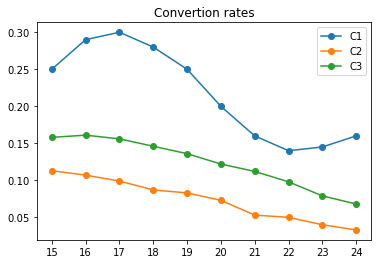

In [5]:
conv_rates = data_gen.get_conversion_rates()

plt.figure()
plt.xticks(prices)
for i in range(0,len(conv_rates)):
    plt.plot(prices, conv_rates[i], '-o', label=categories[i])
    
plt.legend(loc='best')
plt.title("Convertion rates")
plt.show()

#### Daily clicks

In [6]:
help(data_gen.get_daily_clicks)

Help on method get_daily_clicks in module data_generators.standard_generator:

get_daily_clicks(mode='all') method of data_generators.standard_generator.StandardDataGenerator instance
            Get the distribution probability over the number of daily clicks with respect to the bid of the advertisement
            campaign given the price.
            
    The output depends on the `mode` kwarg.
            [options: mode = `all` -> disjoint (default), mode = `aggregate` -> aggregation performed as a weighted average]
            
    Model: `upper_bound` * (1.0 - exp(-1 * `speed_factor` * `bids`))



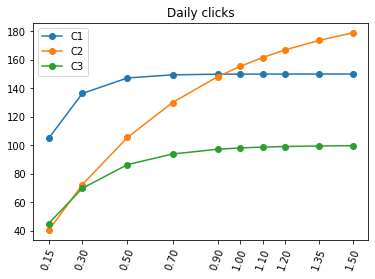

In [7]:
daily_clicks = data_gen.get_daily_clicks()

plt.figure()
plt.xticks(bids, rotation = 70)

for i in range(0,len(daily_clicks)):
    plt.plot(bids, daily_clicks[i], '-o', label=categories[i])
    
plt.legend(loc='best')
plt.title("Daily clicks")
plt.show()

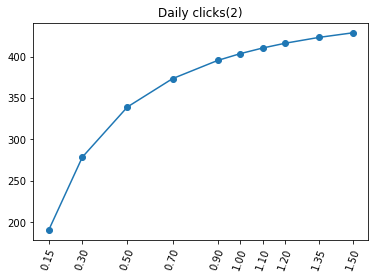

In [8]:
aggr_daily_click = data_gen.get_daily_clicks(mode='aggregate')
plt.figure()
plt.xticks(bids, rotation = 70)
plt.plot(bids, aggr_daily_click, '-o')    
plt.title("Daily clicks(2)")
plt.show()

In [9]:
print(f'{aggr_daily_click=}')

aggr_daily_click=array([190.236, 278.747, 339.246, 373.377, 395.308, 403.492, 410.34 ,
       416.107, 423.147, 428.671])


#### Costs per click

In [10]:
help(data_gen.get_costs_per_click)

Help on method get_costs_per_click in module data_generators.standard_generator:

get_costs_per_click(mode='all', bid=None) method of data_generators.standard_generator.StandardDataGenerator instance
            Get the distribution probability over the cost per click as a function of the bid
            
    The output depends on the `mode` kwarg.
            [options: mode = `all` -> disjoint (default), mode = `aggregate` -> aggregation performed as a weighted average]
            
    Model: `coefficient` * log(1 + `bids`/`coefficient`)



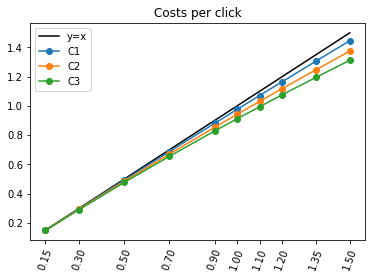

In [11]:
costs = data_gen.get_costs_per_click()

plt.figure()
plt.xticks(bids, rotation = 70)
plt.plot(bids,bids, color='black', label="y=x")
for i in range(0,len(costs)):
    plt.plot(bids, costs[i], '-o', label=categories[i])
    
plt.legend(loc='best')
plt.title("Costs per click")
plt.show()

#### Future purchases

In [12]:
help(data_gen.get_future_purchases)

Help on method get_future_purchases in module data_generators.standard_generator:

get_future_purchases(mode='all', bid=None) method of data_generators.standard_generator.StandardDataGenerator instance
            Get the distribution probability over the number of times the user will come back to the
            ecommerce website to buy another consumable item by 30 days after the first purchase (at the same price).
    
            The output depends on the `mode` kwarg.
    
            [options: mode = `all` -> disjoint (default), mode = `aggregate` -> aggregation performed as a weighted average]
            
    Model: np.maximum('lower_bound', 'coefficient'*(- prices + min(prices)) + 'upper_bound')



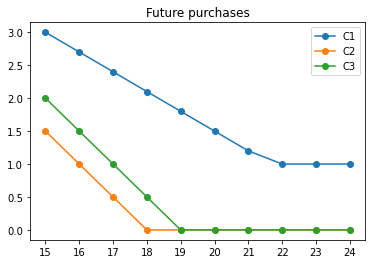

In [13]:
next_purch = data_gen.get_future_purchases()

plt.figure()
plt.xticks(prices)
for i in range(0,len(next_purch)):
    plt.plot(prices, next_purch[i], '-o', label=categories[i])
    
plt.legend(loc='best')
plt.title("Future purchases")

plt.show()

___

OLD

In [14]:
dg = StandardDataGenerator('src/basic005.json')
print('src:\t',dg.get_source())
print('\nbid\tr_aggr\t\tglobal\t\t\tdelta')
for j, bid in enumerate(dg.get_bids()):
    maxs=[]
    cost = dg.get_costs_per_click(mode='aggregate', bid=j)[j]
    clicks = dg.get_daily_clicks(mode='aggregate')[j]
    conv = dg.get_conversion_rates()
    fp = dg.get_future_purchases()
    for i in range(len(dg.get_classes())):
        maxs.append(np.max((conv[i] *(1 + fp[i]) * dg.get_margins() - cost) * dg.get_daily_clicks()[i, j]))
    
    temp = (dg.get_margins() * np.average(conv * (1 + fp), axis=0, weights=dg.get_class_distributions(bid=j)) - 
        cost) * clicks
    disaggr = np.around(sum(maxs), decimals=4)
    aggr = np.around(np.max(temp), decimals=4)
    delta = np.around(disaggr-aggr, decimals=4)
    print(f'{j}\t{disaggr}\t{aggr}\t-->\t{delta}')

src:	 src/basic005.json

bid	r_aggr		global			delta
0	1082.1208	1046.957	-->	35.1638
1	1109.3985	1071.8745	-->	37.524
2	1122.5162	1083.0058	-->	39.5104
3	1121.6921	1079.0311	-->	42.661
4	1099.4129	1054.3324	-->	45.0805
5	1045.7001	997.8641	-->	47.836
6	979.7609	929.8629	-->	49.898
7	932.4109	881.4119	-->	50.999
8	807.7785	754.7065	-->	53.072
9	681.0982	626.6326	-->	54.4656


---

In [15]:
#New
def print_src_optimal_values(src):
    dg = StandardDataGenerator(src)
    print('src:\t',dg.get_source())
    print('\nbid\tglobal\t\taggregated\t\t\tdelta')
    aggr_arr = []
    aggr_prices = []
    global_arr = []
    for j, bid in enumerate(dg.get_bids()):
        maxs=[]
        f_cost = dg.get_costs_per_click(mode='aggregate', bid=j)[j]
        clicks = dg.get_daily_clicks(mode='aggregate')[j]
        conv = dg.get_conversion_rates()
        fp = dg.get_future_purchases()
        for i in range(len(dg.get_classes())):
            maxs.append(np.max((conv[i] *(1 + fp[i]) * dg.get_margins() - dg.get_costs_per_click()[i,j]) * dg.get_daily_clicks()[i, j]))
        global_arr.append(sum(maxs))
        
        temp = (dg.get_margins() * np.average(conv * (1 + fp), axis=0, weights=dg.get_class_distributions(bid=j)) - 
            f_cost) * clicks

        aggr_arr.append(np.max(temp))
        aggr_prices.append(np.argmax(temp))
        disaggr = np.around(sum(maxs), decimals=4)
        aggr = np.around(np.max(temp), decimals=4)
        delta = np.around(disaggr-aggr, decimals=4)
        print(f'{j}\t{disaggr}\t{aggr}\t-->\t{delta}')
    opt_aggr = max(aggr_arr)
    opt_bid = np.argmax(aggr_arr)
    opt_price = aggr_prices[opt_bid]
    print(f'\nAGGR.:\t opt_value={opt_aggr}, opt_bid={opt_bid}, opt_price={opt_price}')
    opt_global = max(global_arr)
    opt_global_bid = np.argmax(global_arr)
    print(f'GLOBAL:\t opt_value={opt_global}, opt_bid={opt_global_bid}')

In [16]:
#NEW!
print_src_optimal_values('src/basic005.json')

src:	 src/basic005.json

bid	global		aggregated			delta
0	1081.9945	1046.957	-->	35.0375
1	1109.2122	1071.8745	-->	37.3377
2	1122.3881	1083.0058	-->	39.3823
3	1121.4206	1079.0311	-->	42.3895
4	1099.1524	1054.3324	-->	44.82
5	1045.4969	997.8641	-->	47.6328
6	979.6053	929.8629	-->	49.7424
7	932.1964	881.4119	-->	50.7845
8	808.208	754.7065	-->	53.5015
9	680.911	626.6326	-->	54.2784

AGGR.:	 opt_value=1083.005829407839, opt_bid=2, opt_price=2
GLOBAL:	 opt_value=1122.3880780000002, opt_bid=2


---

In [17]:
#NEW!
print_src_optimal_values('src/basic004.json')

src:	 src/basic004.json

bid	global		aggregated			delta
0	1026.6631	1026.6897	-->	-0.0266
1	1053.294	1053.3706	-->	-0.0766
2	1066.4594	1066.461	-->	-0.0016
3	1066.3546	1066.481	-->	-0.1264
4	1045.381	1045.4783	-->	-0.0973
5	993.6601	993.6776	-->	-0.0175
6	929.3838	929.3358	-->	0.048
7	882.8575	882.8584	-->	-0.0009
8	760.5227	759.8604	-->	0.6623
9	634.3164	634.2576	-->	0.0588

AGGR.:	 opt_value=1066.4810040000002, opt_bid=3, opt_price=2
GLOBAL:	 opt_value=1066.4594132, opt_bid=2


In [18]:
#NEW!
print_src_optimal_values('src/basic006.json')

src:	 src/basic006.json

bid	global		aggregated			delta
0	595.078	591.678	-->	3.4
1	757.1849	752.0399	-->	5.145
2	936.4928	928.4228	-->	8.07
3	1007.9271	997.8231	-->	10.104
4	1022.55	1009.5251	-->	13.0249
5	971.2294	954.9758	-->	16.2536
6	842.9684	823.6058	-->	19.3626
7	721.1398	699.3749	-->	21.7649
8	544.5396	521.7996	-->	22.74
9	344.4404	320.4376	-->	24.0028

AGGR.:	 opt_value=1009.52514, opt_bid=4, opt_price=3
GLOBAL:	 opt_value=1022.5499783999999, opt_bid=4


In [19]:
#NEW!
print_src_optimal_values('src/basicCG.json')

src:	 src/basicCG.json

bid	global		aggregated			delta
0	1255.2518	1181.2844	-->	73.9674
1	1290.195	1211.345	-->	78.85
2	1309.2055	1226.333	-->	82.8725
3	1316.4878	1228.2539	-->	88.2339
4	1300.7043	1209.0754	-->	91.6289
5	1257.1021	1162.1222	-->	94.9799
6	1203.32	1106.9154	-->	96.4046
7	1165.3041	1068.4519	-->	96.8522
8	1068.3859	971.023	-->	97.3629
9	971.6166	873.8864	-->	97.7302

AGGR.:	 opt_value=1228.2539205, opt_bid=3, opt_price=2
GLOBAL:	 opt_value=1316.4877785, opt_bid=3


In [20]:
#NEW!
print_src_optimal_values('src/basic005.json')

src:	 src/basic005.json

bid	global		aggregated			delta
0	1081.9945	1046.957	-->	35.0375
1	1109.2122	1071.8745	-->	37.3377
2	1122.3881	1083.0058	-->	39.3823
3	1121.4206	1079.0311	-->	42.3895
4	1099.1524	1054.3324	-->	44.82
5	1045.4969	997.8641	-->	47.6328
6	979.6053	929.8629	-->	49.7424
7	932.1964	881.4119	-->	50.7845
8	808.208	754.7065	-->	53.5015
9	680.911	626.6326	-->	54.2784

AGGR.:	 opt_value=1083.005829407839, opt_bid=2, opt_price=2
GLOBAL:	 opt_value=1122.3880780000002, opt_bid=2


In [21]:
#NEW!
print_src_optimal_values('src/basic007.json')

src:	 src/basic007.json

bid	global		aggregated			delta
0	749.5419	733.5227	-->	16.0192
1	974.8902	947.8802	-->	27.01
2	1029.2788	991.8645	-->	37.4143
3	998.9558	954.6076	-->	44.3482
4	941.6652	892.6247	-->	49.0405
5	908.587	857.7958	-->	50.7912
6	873.8306	821.2176	-->	52.613
7	838.083	784.2213	-->	53.8617
8	783.1547	727.5443	-->	55.6104
9	727.1362	670.438	-->	56.6982

AGGR.:	 opt_value=991.864467, opt_bid=2, opt_price=2
GLOBAL:	 opt_value=1029.278836, opt_bid=2
